In [185]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [186]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#  - Forward pass: compute prediction and loss
#  - Backward pass: gradients
#  - Update weights

In [187]:
# 0) Prepare data

# Generation dataset with sklearn
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

# Convert numpy sets to torch
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

print(f'X_numpy: {type(X_numpy)}\nX: {type(X)}')

# Convert y: [a, a, a...] => [[a], [a], [a]...]
# Alternative - before convert to torch: y_numpy.reshape(y_numpy.shape[0], -1)
y = y.view(y.shape[0], -1)

# Number of samples and features
n_samples, n_features = X.shape
print('\nn_samples:', n_samples, '\nn_features:', n_features)

X_numpy: <class 'numpy.ndarray'>
X: <class 'torch.Tensor'>

n_samples: 100 
n_features: 1


In [188]:
# 1) Design model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

In [189]:
# 2) Loss and Optimizer
learning_rate = 0.01

# MSE (function of error <loss>)
criterion = nn.MSELoss()

# Gradient <optimizer>
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [190]:
# 3) Training loop
n_epochs = 100

for epoch in range(n_epochs):
    # Forward pass
    y_predicted = model.forward(X)

    # Loss
    loss = criterion(y, y_predicted)

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # clear gradients => grad = 0
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        # loss.item() => accurate value
        print(f'Epoch: {epoch}, loss: {loss.item()}')

Epoch: 9, loss: 4323.71142578125
Epoch: 19, loss: 3228.7353515625
Epoch: 29, loss: 2435.953369140625
Epoch: 39, loss: 1861.3790283203125
Epoch: 49, loss: 1444.559326171875
Epoch: 59, loss: 1141.91796875
Epoch: 69, loss: 922.001708984375
Epoch: 79, loss: 762.0797729492188
Epoch: 89, loss: 645.7062377929688
Epoch: 99, loss: 560.9695434570312


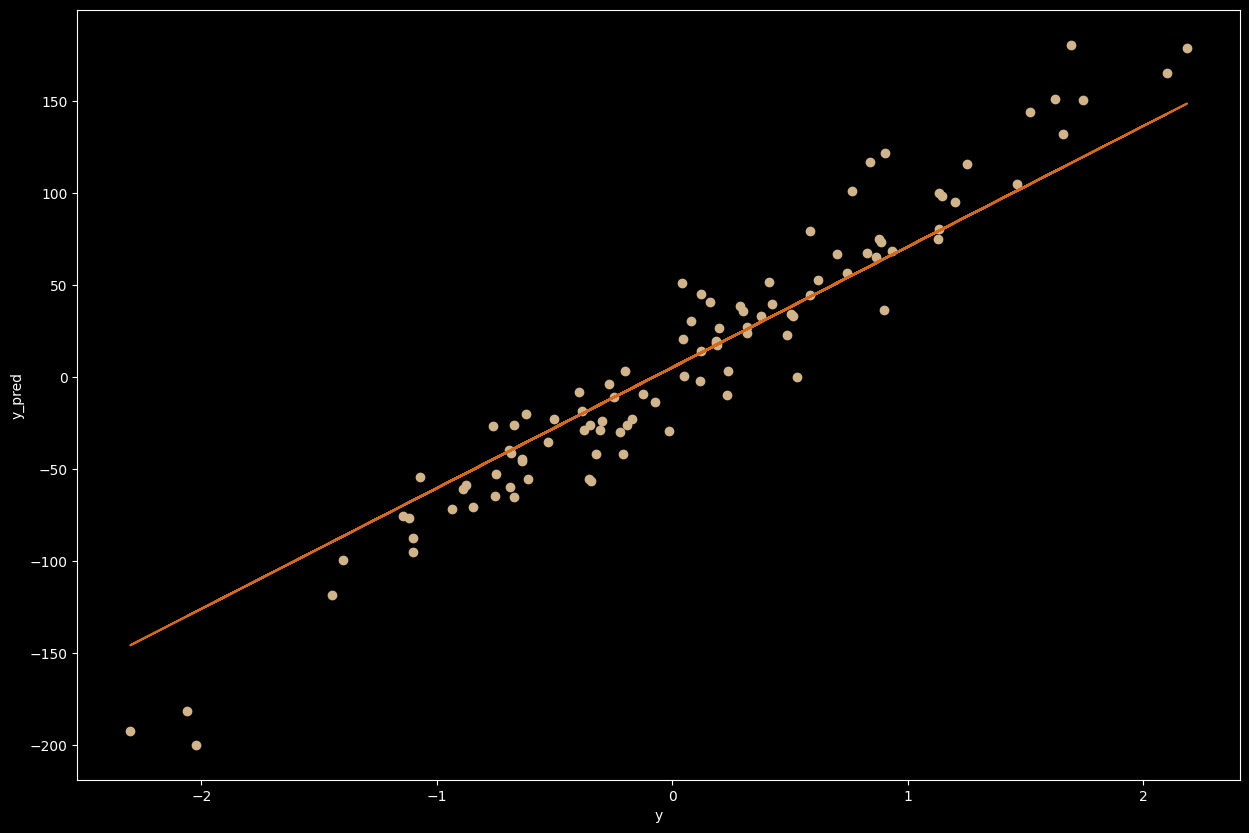

In [191]:
# Plot
# convert y_pred <pytorch> to numpy
predicted = model(X).detach().numpy()
print()
plt.figure(figsize=(15, 10))

# prediction line
plt.plot(X_numpy, predicted, c='chocolate')

# points of real values
plt.scatter(X_numpy, y_numpy, c='tan')

plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()